In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# By using real data - sklearn
dataset=pd.read_csv("student_habits_performance.csv")
dataset.head(6)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,NaN,0.0,NaN,1.1,NaN,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,NaN,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,NaN,1,High School,Poor,1,NaN,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,NaN,Good,1,Yes,26.8
4,S1004,19,Female,5.0,NaN,0.5,NaN,90.9,4.9,NaN,3,Master,NaN,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0


In [6]:
dataset.isnull().sum()

student_id                        0
age                               0
gender                            3
study_hours_per_day               0
social_media_hours                3
netflix_hours                     0
part_time_job                     2
attendance_percentage             0
sleep_hours                       0
diet_quality                      2
exercise_frequency                0
parental_education_level         93
internet_quality                  2
mental_health_rating              0
extracurricular_participation     1
exam_score                        0
dtype: int64

In [7]:
dataset.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,997.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.503711,4.539700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.171309,31.001181,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.600000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,500.500000,100.000000,10.000000,6.000000,10.000000,100.000000


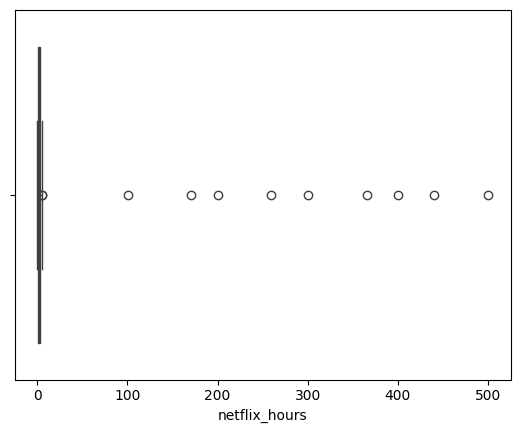

In [8]:
sns.boxplot(x="netflix_hours",data=dataset)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17800\3656471360.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["netflix_hours"])


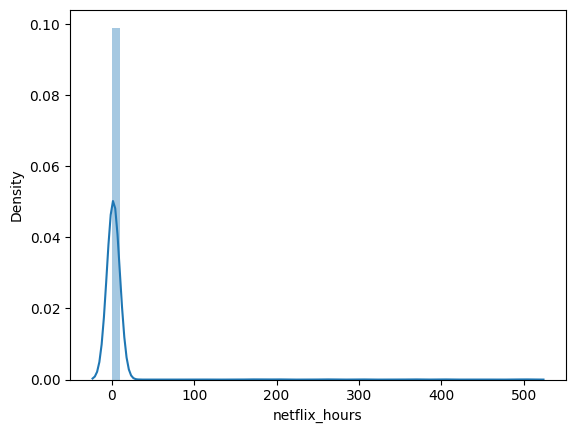

In [9]:
sns.distplot(dataset["netflix_hours"])
plt.show()

In [13]:
# 1. Direct method

min_range= dataset["netflix_hours"].mean()-(3*dataset["netflix_hours"].std())
max_range= dataset["netflix_hours"].mean()+(3*dataset["netflix_hours"].std())
min_range, max_range

(np.float64(-88.46384318107583), np.float64(97.54324318107582))

In [17]:
new_dataset= dataset[dataset["netflix_hours"]<=max_range]
new_dataset.shape

(991, 16)

In [19]:
# 2. z-score mathod

z_score=(dataset["netflix_hours"]-dataset["netflix_hours"].mean())/(dataset["netflix_hours"].std())
z_score

0     -0.110954
1     -0.072246
2     -0.104502
3     -0.114180
4     -0.130308
         ...   
995   -0.094825
996   -0.069020
997   -0.104502
998   -0.110954
999   -0.085148
Name: netflix_hours, Length: 1000, dtype: float64

In [20]:
z_score>3

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: netflix_hours, Length: 1000, dtype: bool

In [22]:
dataset["z_score"]=z_score # new column
dataset.head(6)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,z_score
0,S1000,23,NaN,0.0,NaN,1.1,NaN,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,-0.110954
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,NaN,8,No,100.0,-0.072246
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,NaN,1,High School,Poor,1,NaN,34.3,-0.104502
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,NaN,Good,1,Yes,26.8,-0.114180
4,S1004,19,Female,5.0,NaN,0.5,NaN,90.9,4.9,NaN,3,Master,NaN,1,No,66.4,-0.130308
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0,-0.146436


In [23]:
dataset[dataset["z_score"]<3]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,z_score
0,S1000,23,NaN,0.0,NaN,1.1,NaN,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,-0.110954
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,NaN,8,No,100.0,-0.072246
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,NaN,1,High School,Poor,1,NaN,34.3,-0.104502
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,NaN,Good,1,Yes,26.8,-0.114180
4,S1004,19,Female,5.0,NaN,0.5,NaN,90.9,4.9,NaN,3,Master,NaN,1,No,66.4,-0.130308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,-0.094825
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,-0.069020
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,-0.104502
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7,-0.110954


In [24]:
dataset.shape

(1000, 17)